In [2]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
```
* 
```python
Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
```
* 
```python
Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:




dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

In [7]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5156 - accuracy: 0.7580 - val_loss: 0.3865 - val_accuracy: 0.8168
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3521 - accuracy: 0.8354 - val_loss: 0.3422 - val_accuracy: 0.8432
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3377 - accuracy: 0.8414 - val_loss: 0.3341 - val_accuracy: 0.8440
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3320 - accuracy: 0.8432 - val_loss: 0.3311 - val_accuracy: 0.8465
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3303 - accuracy: 0.8459 - val_loss: 0.3295 - val_accuracy: 0.8448
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3282 - accuracy: 0.8458 - val_loss: 0.3275 - val_accuracy: 0.8473
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3269 - accuracy: 0.8489 - val_loss: 0.3308 - val_accuracy: 0.8428

Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3047 - accuracy: 0.8585 - val_loss: 0.3227 - val_accuracy: 0.8476
Epoch 59/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3033 - accuracy: 0.8589 - val_loss: 0.3200 - val_accuracy: 0.8494
Epoch 60/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3035 - accuracy: 0.8590 - val_loss: 0.3197 - val_accuracy: 0.8499
Epoch 61/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3030 - accuracy: 0.8594 - val_loss: 0.3226 - val_accuracy: 0.8495
Epoch 62/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3029 - accuracy: 0.8585 - val_loss: 0.3195 - val_accuracy: 0.8503
Epoch 63/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3028 - accuracy: 0.8594 - val_loss: 0.3200 - val_accuracy: 0.8505
Epoch 64/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3024 - accuracy: 0.8593 - val_loss: 0.3199 - val_accuracy:

In [8]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

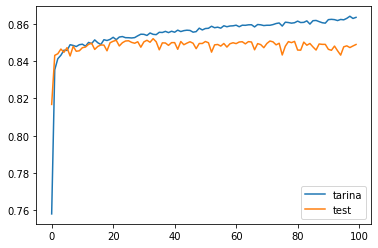

In [9]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

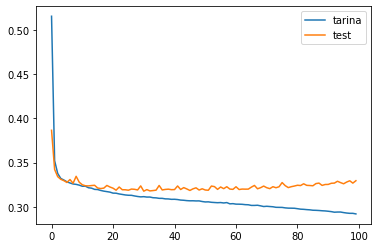

In [10]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# RMSprop

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_RMSprop = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(loss="binary_crossentropy",optimizer=RMSprop, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_RMSprop])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3736 - accuracy: 0.8243 - val_loss: 0.3415 - val_accuracy: 0.8428
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3373 - accuracy: 0.8426 - val_

943/943 [==============================] - 1s 1ms/step - loss: 0.3030 - accuracy: 0.8616 - val_loss: 0.3287 - val_accuracy: 0.8505
Epoch 51/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3029 - accuracy: 0.8616 - val_loss: 0.3245 - val_accuracy: 0.8505
Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3021 - accuracy: 0.8626 - val_loss: 0.3254 - val_accuracy: 0.8501
Epoch 53/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3018 - accuracy: 0.8626 - val_loss: 0.3255 - val_accuracy: 0.8516
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3008 - accuracy: 0.8630 - val_loss: 0.3274 - val_accuracy: 0.8511
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3010 - accuracy: 0.8623 - val_loss: 0.3239 - val_accuracy: 0.8505
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3006 - accuracy: 0.8627 - val_loss: 0.3256 - val_accuracy: 0.8507
Epoch

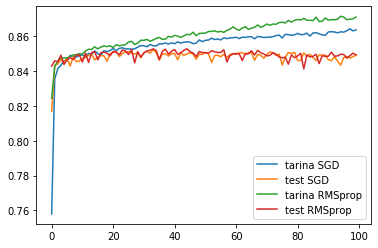

In [12]:
import matplotlib.pyplot as plt
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
plt.legend()
plt.show()

# Adagrad

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_Adagrad = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(loss="binary_crossentropy",optimizer=Adagrad, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adagrad])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.7511 - val_loss: 0.5470 - val_accuracy: 0.7543
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5401 - accuracy: 0.7511 - val_

Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3246 - accuracy: 0.8492 - val_loss: 0.3286 - val_accuracy: 0.8475
Epoch 53/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3246 - accuracy: 0.8494 - val_loss: 0.3284 - val_accuracy: 0.8476
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3244 - accuracy: 0.8498 - val_loss: 0.3284 - val_accuracy: 0.8480
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3244 - accuracy: 0.8492 - val_loss: 0.3283 - val_accuracy: 0.8473
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3242 - accuracy: 0.8492 - val_loss: 0.3282 - val_accuracy: 0.8482
Epoch 57/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3241 - accuracy: 0.8492 - val_loss: 0.3281 - val_accuracy: 0.8477
Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3240 - accuracy: 0.8492 - val_loss: 0.3280 - val_accuracy:

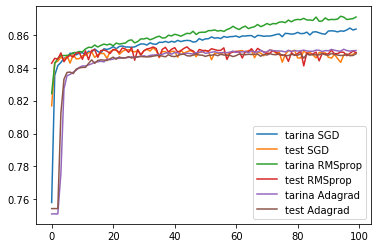

In [14]:
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
plt.plot(history_Adagrad.history['accuracy'], label = "tarina Adagrad")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test Adagrad")
plt.legend()
plt.show()

# Adadelta

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_Adadelta = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss="binary_crossentropy",optimizer=Adadelta, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adadelta])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3997 - accuracy: 0.8127 - val_loss: 0.3506 - val_accuracy: 0.8426
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3386 - accuracy: 0.8427 - val_

Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3002 - accuracy: 0.8607 - val_loss: 0.3212 - val_accuracy: 0.8497
Epoch 53/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2999 - accuracy: 0.8609 - val_loss: 0.3240 - val_accuracy: 0.8475
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2995 - accuracy: 0.8600 - val_loss: 0.3217 - val_accuracy: 0.8507
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2989 - accuracy: 0.8609 - val_loss: 0.3229 - val_accuracy: 0.8513
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2987 - accuracy: 0.8605 - val_loss: 0.3210 - val_accuracy: 0.8497
Epoch 57/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2978 - accuracy: 0.8611 - val_loss: 0.3205 - val_accuracy: 0.8500
Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2977 - accuracy: 0.8614 - val_loss: 0.3244 - val_accuracy:

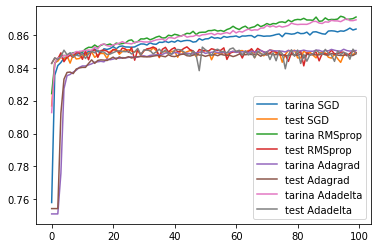

In [16]:
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
plt.plot(history_Adagrad.history['accuracy'], label = "tarina Adagrad")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test Adagrad")
plt.plot(history_Adadelta.history['accuracy'], label = "tarina Adadelta")
plt.plot(history_Adadelta.history['val_accuracy'], label = "test Adadelta")
plt.legend()
plt.show()

# Adam

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_Adam = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adam])



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3821 - accuracy: 0.8237 - val_loss: 0.3514 - val_accuracy: 0.8326
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3363 - accuracy: 0.8443 - val_

Epoch 52/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2746 - accuracy: 0.8694 - val_loss: 0.3369 - val_accuracy: 0.8497
Epoch 53/100
943/943 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.8706 - val_loss: 0.3464 - val_accuracy: 0.8378
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2735 - accuracy: 0.8712 - val_loss: 0.3415 - val_accuracy: 0.8459
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2718 - accuracy: 0.8720 - val_loss: 0.3404 - val_accuracy: 0.8500
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2717 - accuracy: 0.8718 - val_loss: 0.3465 - val_accuracy: 0.8449
Epoch 57/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2706 - accuracy: 0.8727 - val_loss: 0.3447 - val_accuracy: 0.8468
Epoch 58/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2702 - accuracy: 0.8737 - val_loss: 0.3435 - val_accuracy:

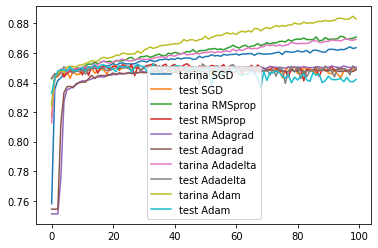

In [18]:
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
plt.plot(history_Adagrad.history['accuracy'], label = "tarina Adagrad")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test Adagrad")
plt.plot(history_Adadelta.history['accuracy'], label = "tarina Adadelta")
plt.plot(history_Adadelta.history['val_accuracy'], label = "test Adadelta")
plt.plot(history_Adam.history['accuracy'], label = "tarina Adam")
plt.plot(history_Adam.history['val_accuracy'], label = "test Adam")
plt.legend()
plt.show()

# learning rate

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_Adam_1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adam_1])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_21 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5918 - accuracy: 0.7191 - val_loss: 0.5501 - val_accuracy: 0.7543
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5199 - accuracy: 0.7550 - val_

Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3179 - accuracy: 0.8516 - val_loss: 0.3223 - val_accuracy: 0.8494
Epoch 53/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3177 - accuracy: 0.8511 - val_loss: 0.3223 - val_accuracy: 0.8493
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3174 - accuracy: 0.8508 - val_loss: 0.3222 - val_accuracy: 0.8491
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3173 - accuracy: 0.8509 - val_loss: 0.3219 - val_accuracy: 0.8499
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3169 - accuracy: 0.8514 - val_loss: 0.3222 - val_accuracy: 0.8489
Epoch 57/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3169 - accuracy: 0.8515 - val_loss: 0.3218 - val_accuracy: 0.8495
Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3168 - accuracy: 0.8509 - val_loss: 0.3219 - val_accuracy:

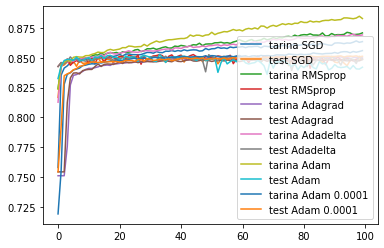

In [20]:
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
plt.plot(history_Adagrad.history['accuracy'], label = "tarina Adagrad")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test Adagrad")
plt.plot(history_Adadelta.history['accuracy'], label = "tarina Adadelta")
plt.plot(history_Adadelta.history['val_accuracy'], label = "test Adadelta")
plt.plot(history_Adam.history['accuracy'], label = "tarina Adam")
plt.plot(history_Adam.history['val_accuracy'], label = "test Adam")

plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.0001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.0001")
plt.legend()
plt.show()

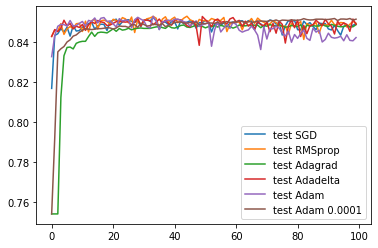

In [21]:
# plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
# plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
# plt.plot(history_Adagrad.history['accuracy'], label = "tarina Adagrad")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test Adagrad")
# plt.plot(history_Adadelta.history['accuracy'], label = "tarina Adadelta")
plt.plot(history_Adadelta.history['val_accuracy'], label = "test Adadelta")
# plt.plot(history_Adam.history['accuracy'], label = "tarina Adam")
plt.plot(history_Adam.history['val_accuracy'], label = "test Adam")

# plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.0001")
plt.legend()
plt.show()